In [1]:
from fastbook import *


In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=69):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('Images of russian MIG 29', max_images=150)
urls[0]

Searching for 'Images of russian MIG 29'


C:\Users\karti\anaconda3\lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
C:\Users\karti\anaconda3\lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
C:\Users\karti\anaconda3\lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'https://imgproc.airliners.net/photos/airliners/7/3/5/6175537.jpg?v=v41c985c354b'

In [4]:
searches = 'Images of Russian MIG 29','Images of other aircraft except MIG 29'
path = Path('MIG 29_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} full Body'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} side photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} in air'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'Images of Russian MIG 29 full Body'
Searching for 'Images of Russian MIG 29 side photo'
Searching for 'Images of Russian MIG 29 in air'
Searching for 'Images of other aircraft except MIG 29 full Body'
Searching for 'Images of other aircraft except MIG 29 side photo'
Searching for 'Images of other aircraft except MIG 29 in air'


In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

9

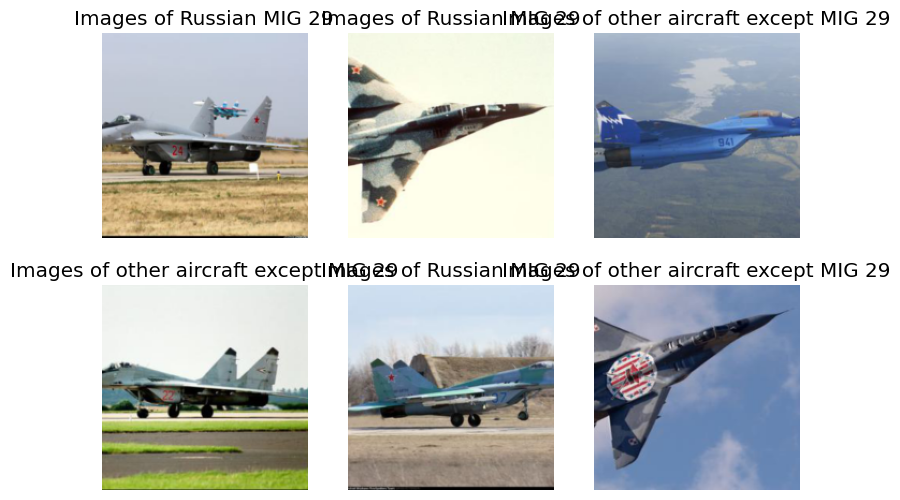

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='RandomResizeCrop')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(25)

C:\Users\karti\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\karti\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.268817,0.985692,0.449275,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.146390,0.695523,0.362319,00:02
1,0.989995,0.726931,0.376812,00:01
2,0.881755,0.772256,0.376812,00:01
3,0.769873,0.843611,0.362319,00:01
4,0.703561,1.066399,0.362319,00:01
5,0.639403,1.218580,0.391304,00:01
6,0.596683,1.235765,0.347826,00:01
7,0.552078,1.179133,0.304348,00:01
8,0.514167,1.325992,0.362319,00:01
9,0.476532,1.309301,0.347826,00:01


In [12]:
learn = vision_learner(dls, resnet18, metrics=[error_rate, accuracy])
learn.fine_tune(30)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.249143,1.216575,0.521739,0.478261,00:01


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.106267,0.839739,0.449275,0.550725,00:01
1,0.982409,0.770278,0.391304,0.608696,00:01
2,0.900292,0.837510,0.318841,0.681159,00:01
3,0.811287,0.962910,0.304348,0.695652,00:01
4,0.727955,1.031267,0.376812,0.623188,00:01
5,0.670195,1.161466,0.333333,0.666667,00:02
6,0.597353,1.343490,0.376812,0.623188,00:03
7,0.548439,1.394041,0.333333,0.666667,00:03
8,0.548367,1.527080,0.304348,0.695652,00:03
9,0.523920,1.569176,0.333333,0.666667,00:03


In [22]:
uploader = widgets.FileUpload()
uploader
    

FileUpload(value={}, description='Upload')

In [24]:
img = PILImage.create(uploader.data[0])
is_MIG29,_,probs = learn.predict(img)

print(f"Probability it's a MIG 29: {probs[1].item():.6f}")

Probability it's a MIG 29: 0.011577
